In [3]:
import numpy as np
import pandas as pd
import math

pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)

import random
import pickle

import time

import sys
sys.path.append("../../")

from src.print_result import print_player
from src.utils import create_all_member

from config.formation import *
from config.config import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [4]:
with open('../../data/pickle/20230222v1_50y.pickle', mode='rb') as f:
    ws = pickle.load(f)

In [5]:
all_member = create_all_member(ws, 2050)

In [6]:
output = pd.DataFrame()

for c in ws.country_leagues:
    output = pd.concat([output, c.players_result])

output = pd.concat([output, ws.players_result])
output = output.sort_values("年度")
ws.players_result = output

# 結果一覧

## リーグ・カップ戦結果

In [7]:
print("チーム一覧")
print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        print(c.leagues[league_num].name)
        print([[i, t.name] for i, t in enumerate(c.leagues[league_num].teams)])

    print()

for c in ws.country_leagues:
    for league_num in range(len(c.leagues)):
        display(c.leagues[league_num].champion)

    display(c.competition_result_top)

チーム一覧

Premier
[[0, 'Brighton'], [1, 'Bournemouth'], [2, 'Cardiff'], [3, 'Stoke'], [4, 'Burnely'], [5, 'Preston'], [6, 'Burton'], [7, 'AstonVilla'], [8, 'Oxford'], [9, 'Plymouth'], [10, 'Blackpool'], [11, 'Nottingham'], [12, 'Everton'], [13, 'HullCity'], [14, 'Wigan'], [15, 'Crewe'], [16, 'CrystalPalace'], [17, 'Birmingham'], [18, 'ManchesterCity'], [19, 'WestHam']]
Championship
[[0, 'Chelsea'], [1, 'Millwall'], [2, 'Fulham'], [3, 'Arsenal'], [4, 'Portsmouth'], [5, 'Fleetwood'], [6, 'Ipswitch'], [7, 'Chalton'], [8, 'Wolverhampton'], [9, 'Northampton'], [10, 'LutonTown'], [11, 'Blackburn'], [12, 'ManchesterUnited'], [13, 'Gillingham'], [14, 'Southampton'], [15, 'Middlesbrough'], [16, 'Bristol'], [17, 'Dons'], [18, 'Liverpool'], [19, 'Leeds']]
EFL1
[[0, 'Peterborough'], [1, 'Huddersfield'], [2, 'AFC'], [3, 'SheffieldUnited'], [4, 'Doncaster'], [5, 'Leicester'], [6, 'Swansea'], [7, 'Lincoln'], [8, 'Norwich'], [9, 'ShefieldWednesday'], [10, 'WBA'], [11, 'Accrington'], [12, 'Tottenham'], [1

,優勝,得点王,MVP,yMVP,ベストGK
Premier_2000,Leicester,"Traivon(Newcastle), / 21点","Zaccary(Leicester),","Trapper(Arsenal),","Leon(Brentford),"
Premier_2001,Tottenham,"Constantino(Arsenal), / 18点","Fate(ManchesterCity),","Granger(Tottenham),","Cleland(Tottenham),"
Premier_2002,Wolverhampton,"Constantino(Arsenal), / 21点","Surafel(Arsenal),","Aniket(AstonVilla),","Marcial(Arsenal),"
Premier_2003,Nottingham,"Bryon(Tottenham), / 21点","Ayo(Nottingham),","Zackry(Southampton),","Valeria(WestHam),"
Premier_2004,Wolverhampton,"Wheeler(AstonVilla), / 19点","Wheeler(AstonVilla),","Odes(Liverpool),","Hardie(Fulham),"
Premier_2005,Wolverhampton,"Ferdie(Wolverhampton), / 23点","Dacari(Wolverhampton),","Dacari(Wolverhampton),","Secundino(Wolverhampton),"
Premier_2006,Wolverhampton,"Ferdie(Wolverhampton), / 29点","Ferdie(Wolverhampton),","Alpha(Fulham),","Secundino(Wolverhampton),"
Premier_2007,Wolverhampton,"Kori(Brentford), / 24点","Ferdie(Wolverhampton),","Jarah(Tottenham),","Oryan(Leeds),"
Premier_2008,Wolverhampton,"Ferdie(Wolverhampton), / 34点","Ferdie(Wolverhampton),","Torin(Liverpool),","Tammie(Tottenham),"
Premier_2009,Liverpool,"Cortez(Fulham), Micahi(Leeds), / 20点","Torin(Liverpool),","Jared(Liverpool),","Taysean(Liverpool),"


,優勝,得点王,MVP,yMVP,ベストGK
Championship_2000,Huddersfield,"Errol(Blackpool), / 24点","Burley(Reading),","Geffrey(Norwich),","Brinton(Huddersfield),"
Championship_2001,ManchesterUnited,"Summer(Burnely), / 26点","Isidoro(ManchesterUnited),","Teshaun(ManchesterUnited),","Zykee(ManchesterUnited),"
Championship_2002,Huddersfield,"Kashmir(Huddersfield), / 27点","Steele(Blackburn),","Kashmir(Huddersfield),","Mendel(Stoke),"
Championship_2003,ManchesterUnited,"Diante(Cardiff), / 28点","Isidoro(ManchesterUnited),","Christy(ManchesterUnited),","Twan(Cardiff),"
Championship_2004,Blackburn,"Tiras(Blackburn), / 19点","Guthrie(Stoke),","Tiras(Blackburn),","Justun(Stoke),"
Championship_2005,ManchesterUnited,"Hermenegildo(LutonTown), / 25点","Aliou(ManchesterUnited),","Dixie(ManchesterUnited),","Tritan(Everton),"
Championship_2006,Stoke,"Hermenegildo(LutonTown), Brode(ShefieldWednesd...","Katrell(Stoke),","Jacorian(Stoke),","Demian(Stoke),"
Championship_2007,Cardiff,"Winfield(Cardiff), / 22点","Advay(Arsenal),","Tarren(Arsenal),","Dyshaun(Cardiff),"
Championship_2008,Stoke,"Roby(LutonTown), Wallie(Swansea), / 23点","Dionne(Stoke),","Bascom(Stoke),","Franz(Swansea),"
Championship_2009,Brentford,"Thaxton(Burnely), Louden(Millwall), / 26点","Thaxton(Burnely),","Nachman(Arsenal),","Philemon(Brentford),"


,優勝,得点王,MVP,yMVP,ベストGK
EFL1_2000,Sunderland,"Hughes(Gillingham), / 23点","Marcel(Sunderland),","Max(Wigan),","Abhay(Sunderland),"
EFL1_2001,QPR,"Yaron(QPR), / 18点","Hunter(Middlesbrough),","Josef(Middlesbrough),","Joshue(Middlesbrough),"
EFL1_2002,Wigan,"Chad(Wigan), / 24点","Chad(Wigan),","Chad(Wigan),","Jorian(Wigan),"
EFL1_2003,QPR,"Bevan(Portsmouth), / 23点","Gabriel(ShefieldWednesday),","Taevin(QPR),","Dimitry(QPR),"
EFL1_2004,Coventry,"Hardik(Portsmouth), / 20点","Lydon(Oxford),","Lydon(Oxford),","Sabin(Burton),"
EFL1_2005,Burton,"Salome(Chalton), / 21点","Lavan(Dons),","Lavan(Dons),","Sabin(Burton),"
EFL1_2006,Bristol,"Dolphus(Northampton), / 26点","Blakely(Middlesbrough),","Blakely(Middlesbrough),","Johnn(Middlesbrough),"
EFL1_2007,Sunderland,"Khadim(Burton), / 20点","Slate(Sunderland),","Zev(Sunderland),","Sabin(Burton),"
EFL1_2008,Norwich,"Kashten(Middlesbrough), / 24点","Elby(Dons),","Kashten(Middlesbrough),","Wilber(Middlesbrough),"
EFL1_2009,Bristol,"Dakkota(Northampton), / 29点","Alecxander(Bristol),","Alecxander(Bristol),","Ross(Bristol),"


,年度,優勝,準優勝,得点王
FA 杯_2000,2000,ManchesterUnited(Premier),Leeds(Premier),"Errol(Blackpool(Championship)), Yaron(QPR(Cham..."
FA 杯_2001,2001,Arsenal(Premier),Brighton(Premier),"Odean(Brighton(Premier)), / 8点"
FA 杯_2002,2002,AstonVilla(Premier),ManchesterCity(Premier),"Bernie(Leeds(Premier)), / 6点"
FA 杯_2003,2003,Southampton(Premier),AstonVilla(Premier),"Bryon(Tottenham(Premier)), / 7点"
FA 杯_2004,2004,Reading(Premier),Leicester(Premier),"Achille(ManchesterCity(Premier)), / 6点"
FA 杯_2005,2005,Nottingham(Premier),Bournemouth(Premier),"Monte(Bournemouth(Premier)), / 7点"
FA 杯_2006,2006,Tottenham(Premier),Liverpool(Premier),"Hall(Brighton(Premier)), / 8点"
FA 杯_2007,2007,AstonVilla(Premier),ManchesterUnited(Premier),"Conner(Wolverhampton(Premier)), / 6点"
FA 杯_2008,2008,Leeds(Premier),ManchesterCity(Premier),"Conner(Wolverhampton(Premier)), / 8点"
FA 杯_2009,2009,ManchesterCity(Premier),Leicester(Premier),"Cortez(Fulham(Premier)), Thorne(Nottingham(Pre..."


,優勝,得点王,MVP,yMVP,ベストGK
La Liga Santander_2000,Girona,"Braden(RealSocidad), / 22点","Renny(Elche),","Gunter(Girona),","Decarlo(Girona),"
La Liga Santander_2001,Barcelona,"Braden(RealSocidad), / 20点","Keyion(Barcelona),","Haneef(Almenia),","Lambert(Barcelona),"
La Liga Santander_2002,Girona,"Keshaun(Girona), / 28点","Gunter(Girona),","Kyren(Barcelona),","Lambert(Barcelona),"
La Liga Santander_2003,Almenia,"Dare(AthleticBilbao), / 27点","Dare(AthleticBilbao),","Haneef(Almenia),","Vin(Almenia),"
La Liga Santander_2004,Girona,"Dare(AthleticBilbao), / 26点","Dare(AthleticBilbao),","Dahmir(Elche),","Kawika(RealSocidad),"
La Liga Santander_2005,AthleticBilbao,"Geremy(AthleticBilbao), / 32点","Dare(AthleticBilbao),","Geremy(AthleticBilbao),","Derec(RealBetis),"
La Liga Santander_2006,Girona,"Regan(RealBetis), / 22点","Gunter(Girona),","Graylin(Girona),","Ocie(Girona),"
La Liga Santander_2007,Elche,"Geremy(AthleticBilbao), / 26点","Dahmir(Elche),","Leary(Barcelona),","Derec(RealBetis),"
La Liga Santander_2008,Elche,"Dixie(Girona), / 24点","Lonnell(Girona),","Marcedes(RealBetis),","Raeford(Elche),"
La Liga Santander_2009,Girona,"Dixie(Girona), / 28点","Lonnell(Girona),","Neville(RealBetis),","Derec(RealBetis),"


,優勝,得点王,MVP,yMVP,ベストGK
La Liga SmartBank_2000,RacingSantander,"Izek(Mirandes), / 24点","Gerald(RacingSantander),","Kejuan(Deporivo),","Raylan(RacingSantander),"
La Liga SmartBank_2001,Valencia,"Jess(Celta), / 27点","Fleming(Valencia),","Jess(Celta),","Garrit(Celta),"
La Liga SmartBank_2002,Mirandes,"Erron(Mirandes), / 30点","Niquan(Mirandes),","Niquan(Mirandes),","Norma(Albacete),"
La Liga SmartBank_2003,Andorra,"Jereld(Cadiz), / 20点","Fabrizio(Levante),","Kennieth(RealMadrid),","Ambrosio(Andorra),"
La Liga SmartBank_2004,Albacete,"Murat(Mallorca), / 22点","Rasaan(Albacete),","Macario(Badajoz),","Ashante(RealMadrid),"
La Liga SmartBank_2005,Andorra,"Shadrach(Levante), / 26点","Cannon(Andorra),","Shadrach(Levante),","Maggie(Andorra),"
La Liga SmartBank_2006,RealMadrid,"Darell(Malaga), / 26点","Dar(RealMadrid),","Adekunle(Tenerife),","Jyron(Tenerife),"
La Liga SmartBank_2007,Getafe,"Shadrach(Levante), / 33点","Shadrach(Levante),","Milan(Getafe),","Christion(Getafe),"
La Liga SmartBank_2008,RealMadrid,"Marcos(Ibiza), / 24点","Narciso(RealMadrid),","Maciah(RealMadrid),","Mitchell(RealMadrid),"
La Liga SmartBank_2009,Getafe,"Orris(Tenerife), / 20点","Tavion(Getafe),","Tavion(Getafe),","Christion(Getafe),"


,優勝,得点王,MVP,yMVP,ベストGK
Primera Division RFEF_2000,Coroba,"Phil(Leonesa), Katsumi(Fuenlabrada), / 19点","Nason(Coroba),","Wiley(Coroba),","Wiliam(Coroba),"
Primera Division RFEF_2001,Intercity,"Sammuel(Uniponstas), Octavius(Numancia), / 21点","Hermann(Ponferradina),","Romi(Intercity),","Lew(Castellon),"
Primera Division RFEF_2002,Badajoz,"Ismeal(Pontevedra), / 21点","Octavius(Numancia),","Octavius(Numancia),","Weston(LinaresDeportivo),"
Primera Division RFEF_2003,Ponferradina,"Amad(Pontevedra), / 24点","Quintin(RealOviedo),","Justun(Ponferradina),","Detrich(Ponferradina),"
Primera Division RFEF_2004,Huesca,"Pierre(LinaresDeportivo), / 29点","Pierre(LinaresDeportivo),","Zeyd(Pontevedra),","Nolan(Huesca),"
Primera Division RFEF_2005,RealZaragoza,"Marquies(ReakMurcia), / 22点","Elbert(RealZaragoza),","Elbert(RealZaragoza),","Justino(RealZaragoza),"
Primera Division RFEF_2006,Algeciras,"Vahe(Algeciras), / 23点","Inez(Coroba),","Inez(Coroba),","Jerald(Algeciras),"
Primera Division RFEF_2007,Lugo,"Ted(Talavera), Marquies(ReakMurcia), / 22点","Joon(SanFernando),","Luay(Lugo),","Nolon(UDLasPalmas),"
Primera Division RFEF_2008,Leganes,"Ervil(RealOviedo), / 23点","Odes(Leganes),","Romuald(Leganes),","Delman(Leganes),"
Primera Division RFEF_2009,Gijon,"Welton(Pontevedra), / 27点","Mikkel(Gijon),","Oz(Coroba),","Nolon(UDLasPalmas),"


,年度,優勝,準優勝,得点王
カラパオ杯_2000,2000,Getafe(La Liga Santander),Sevilla(La Liga Santander),"Latravious(Sevilla(La Liga Santander)), / 8点"
カラパオ杯_2001,2001,Espanyol(La Liga Santander),Barcelona(La Liga Santander),"Harlow(Espanyol(La Liga Santander)), / 8点"
カラパオ杯_2002,2002,Espanyol(La Liga Santander),Elche(La Liga Santander),"Harlow(Espanyol(La Liga Santander)), / 13点"
カラパオ杯_2003,2003,AtleticoDeMadrid(La Liga Santander),Elche(La Liga Santander),"Dixie(Vilarreal(La Liga Santander)), Dahmir(El..."
カラパオ杯_2004,2004,Sevilla(La Liga Santander),Girona(La Liga Santander),"Geremy(AthleticBilbao(La Liga Santander)), Bre..."
カラパオ杯_2005,2005,RealSocidad(La Liga Santander),Valencia(La Liga Santander),"Francois(Girona(La Liga Santander)), / 5点"
カラパオ杯_2006,2006,AtleticoDeMadrid(La Liga Santander),Barcelona(La Liga Santander),"Carl(Barcelona(La Liga Santander)), Tion(Elche..."
カラパオ杯_2007,2007,AtleticoDeMadrid(La Liga Santander),Osasuna(La Liga Santander),"Chip(Almenia(La Liga Santander)), / 7点"
カラパオ杯_2008,2008,RealBetis(La Liga Santander),Girona(La Liga Santander),"Dixie(Girona(La Liga Santander)), / 6点"
カラパオ杯_2009,2009,RealBetis(La Liga Santander),Osasuna(La Liga Santander),"Regan(RealBetis(La Liga Santander)), / 11点"


,優勝,得点王,MVP,yMVP,ベストGK
Bundesliga_2000,Bielefeld,"Felipe(Bielefeld), / 20点","Josef(Wolfsburg),","Ewald(Bielefeld),","Fredrich(BorussiaMG),"
Bundesliga_2001,BorussiaMG,"Nimit(Bayern), / 24点","Josef(Wolfsburg),","Anita(Wolfsburg),","Kazden(Bremen),"
Bundesliga_2002,Bayern,"Deondre(Bayern), / 25点","Deondre(Bayern),","Tyren(Bayern),","Tammie(Leverkusen),"
Bundesliga_2003,BorussiaMG,"Walker(Bochum), / 26点","Deondre(Bayern),","Doran(Leverkusen),","Atreyu(Schalke),"
Bundesliga_2004,Leipzing,"Dimetrius(Hoffenheim), / 21点","Fate(Leipzing),","Ferdie(Augsburg),","Kalib(Leipzing),"
Bundesliga_2005,Schalke,"Jasper(Augsburg), / 26点","Blaine(Schalke),","Shepard(Leipzing),","Kenyetta(Schalke),"
Bundesliga_2006,Bayern,"Argil(Bayern), / 28点","Argil(Bayern),","Harvey(Bayern),","Katsumi(Bayern),"
Bundesliga_2007,Bayern,"Argil(Bayern), / 29点","Deondre(Bayern),","Harvey(Bayern),","Katsumi(Bayern),"
Bundesliga_2008,Bayern,"Argil(Bayern), / 36点","Argil(Bayern),","Dominik(Dortmund),","Jaskirat(Hertha),"
Bundesliga_2009,Bayern,"Argil(Bayern), / 23点","Harvey(Bayern),","Kal(BorussiaMG),","Atreyu(UnionBerlin),"


,優勝,得点王,MVP,yMVP,ベストGK
"2,Bundesliga_2000",GreutherFurch,"Kendal(Dusseldorf), / 26点","Devontay(GreutherFurch),","Jocelyn(TSV),","Louis(Paderborn),"
"2,Bundesliga_2001",Freiburg,"Kori(Frankufurt), / 37点","Kori(Frankufurt),","Kori(Frankufurt),","Augie(Freiburg),"
"2,Bundesliga_2002",Darmstadt,"Caryl(Nuremberg), / 24点","Sevak(GreutherFurch),","Jadon(Darmstadt),","Keithon(Darmstadt),"
"2,Bundesliga_2003",Freiburg,"Lige(Freiburg), / 25点","Jakota(Freiburg),","Lige(Freiburg),","Zyir(Freiburg),"
"2,Bundesliga_2004",GreutherFurch,"Ralston(Holstein), / 24点","Sevak(GreutherFurch),","Sevak(GreutherFurch),","Kevyn(Nuremberg),"
"2,Bundesliga_2005",Freiburg,"Lige(Freiburg), / 23点","Lige(Freiburg),","Lige(Freiburg),","Pape(Magdeburg),"
"2,Bundesliga_2006",GreutherFurch,"Melville(GreutherFurch), / 23点","Danie(GreutherFurch),","Dresean(Darmstadt),","Taye(GreutherFurch),"
"2,Bundesliga_2007",Freiburg,"Abduljabbar(TSV), / 28点","Atlas(HansaRostock),","Atlas(HansaRostock),","Jalon(Freiburg),"
"2,Bundesliga_2008",Augsburg,"Derel(Nuremberg), / 26点","Royce(Koln),","Royce(Koln),","Damone(Augsburg),"
"2,Bundesliga_2009",Ingolstadt,"Acey(Bochum), / 24点","Cristoval(Nuremberg),","Cristoval(Nuremberg),","Frederik(Nuremberg),"


,優勝,得点王,MVP,yMVP,ベストGK
3.Bundesliga_2000,RotWeiss,"Deloss(Saarbrucken), / 22点","Shanna(Aalen),","Wenzel(Aalen),","Hayes(Saarbrucken),"
3.Bundesliga_2001,Kaiserslautern,"Kevyn(Hallescher), / 25点","Lonney(Kaiserslautern),","Jeffory(Regensburg),","French(Regensburg),"
3.Bundesliga_2002,Homburg,"Aden(DynamoDresden), / 22点","Garald(Aalen),","Garald(Aalen),","Terrence(Hannover),"
3.Bundesliga_2003,Kaiserslautern,"Reed(Waldhof), / 20点","Hardy(Kaiserslautern),","Herman(Kaiserslautern),","French(Regensburg),"
3.Bundesliga_2004,LickersOffenbach,"Jame(SSVUlm), / 21点","Colm(LickersOffenbach),","Colm(LickersOffenbach),","Texas(LickersOffenbach),"
3.Bundesliga_2005,Vert,"Antonie(Kaiserslautern), / 25点","Shadrach(Homburg),","Jaise(Vert),","Dwaine(Vert),"
3.Bundesliga_2006,Kaiserslautern,"Leroy(DynamoDresden), / 23点","Gyasi(Kaiserslautern),","Gyasi(Kaiserslautern),","Dominiq(Kaiserslautern),"
3.Bundesliga_2007,Hallescher,"Nealy(Elversberg), / 20点","Rubel(Vert),","Rubel(Vert),","Teodoro(Hallescher),"
3.Bundesliga_2008,Waldhof,"Darrion(WehenWiesbaden), Nealy(Elversberg), ...","Troyce(Vert),","Troyce(Vert),","Barron(Waldhof),"
3.Bundesliga_2009,Regensburg,"Davinci(Kaiserslautern), / 25点","Jatavious(Hallescher),","Jatavious(Hallescher),","Manly(Regensburg),"


,年度,優勝,準優勝,得点王
DFBポカール_2000,2000,Hoffenheim(Bundesliga),Wolfsburg(Bundesliga),"Josef(Wolfsburg(Bundesliga)), Gary(Koln(Bundes..."
DFBポカール_2001,2001,Wolfsburg(Bundesliga),Dortmund(Bundesliga),"Anand(Dortmund(Bundesliga)), / 8点"
DFBポカール_2002,2002,Augsburg(Bundesliga),Bielefeld(Bundesliga),"Jemuel(UnionBerlin(Bundesliga)), Esten(Schalke..."
DFBポカール_2003,2003,Bayern(Bundesliga),Bochum(Bundesliga),"Deondre(Bayern(Bundesliga)), Conner(Bochum(Bun..."
DFBポカール_2004,2004,Bayern(Bundesliga),Bielefeld(Bundesliga),"Argil(Bayern(Bundesliga)), / 6点"
DFBポカール_2005,2005,Bayern(Bundesliga),Wolfsburg(Bundesliga),"Argil(Bayern(Bundesliga)), / 6点"
DFBポカール_2006,2006,Schalke(Bundesliga),Frankufurt(Bundesliga),"Dayshaun(Frankufurt(Bundesliga)), / 8点"
DFBポカール_2007,2007,Bayern(Bundesliga),Bremen(Bundesliga),"Isamar(Bayern(Bundesliga)), / 8点"
DFBポカール_2008,2008,Leipzing(Bundesliga),Hertha(Bundesliga),"Esten(Schalke(Bundesliga)), / 7点"
DFBポカール_2009,2009,Leipzing(Bundesliga),Schalke(Bundesliga),"Esten(Schalke(Bundesliga)), / 6点"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue1_2000,Brestois,"Rudi(Brestois), / 25点","Zakariya(Brestois),","Yan(Lorient),","Deni(Lorient),"
Ligue1_2001,Clermont,"Loy(Clermont), / 24点","Nichlas(Clermont),","Ruddy(Clermont),","Junaid(Clermont),"
Ligue1_2002,Clermont,"Isamar(Clermont), / 32点","Isamar(Clermont),","Valentine(Brestois),","Junaid(Clermont),"
Ligue1_2003,Clermont,"Loy(Clermont), / 24点","Loy(Clermont),","Shakim(Nice),","Harman(Montpellier),"
Ligue1_2004,Reims,"Nathanal(Strasbourg), / 25点","Vernell(Reims),","Quinntin(Reims),","Renato(Reims),"
Ligue1_2005,StadeRennais,"Jess(Brestois), / 20点","Nathanal(Strasbourg),","Nathanal(Strasbourg),","Alexios(Toulouse),"
Ligue1_2006,StadeRennais,"Darnel(Strasbourg), / 29点","Nathanal(Strasbourg),","Jona(StadeRennais),","Damar(StadeRennais),"
Ligue1_2007,Strasbourg,"Darnel(Strasbourg), / 35点","Nathanal(Strasbourg),","Tami(Strasbourg),","Alexios(Strasbourg),"
Ligue1_2008,Strasbourg,"Atreyu(Monaco), Nathanal(Strasbourg), / 25点","Nathanal(Strasbourg),","Rozelle(Clermont),","Alexios(Strasbourg),"
Ligue1_2009,Strasbourg,"Nathanal(Strasbourg), / 34点","Jenssy(Strasbourg),","Spiro(Strasbourg),","Alexios(Strasbourg),"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue2_2000,Metz,"Vance(Metz), / 21点","Vance(Metz),","Vance(Metz),","Shirley(Pau),"
Ligue2_2001,OL,"Trey(OL), / 22点","Uzziel(Auxerre),","Uzziel(Auxerre),","Sahir(OL),"
Ligue2_2002,Metz,"Cayetano(Caen), / 23点","Romuald(Metz),","Romuald(Metz),","Malikah(Metz),"
Ligue2_2003,Dijon,"Emauri(Auxerre), / 25点","Zygmunt(Pau),","Cornelio(OL),","Jalob(Dijon),"
Ligue2_2004,Annecy,"Sal(Auxerre), / 25点","Fitz(Annecy),","Qadry(Annecy),","Derrian(Annecy),"
Ligue2_2005,Pau,"Diante(Pau), / 23点","Keontay(Pau),","Zeus(Pau),","Milledge(Pau),"
Ligue2_2006,Annecy,"Tionne(Metz), / 33点","Tionne(Metz),","Hadley(Metz),","Derrian(Annecy),"
Ligue2_2007,OL,"Dock(Pau), / 27点","Jame(Angers),","Oneal(Angers),","Nathan(Angers),"
Ligue2_2008,Orleans,"Eoin(Rodez), / 26点","Rhea(Orleans),","Rhea(Orleans),","Luby(Orleans),"
Ligue2_2009,Metropole,"Dominyk(Metropole), / 28点","Dominyk(Metropole),","Dominyk(Metropole),","Abdullah(Metropole),"


,優勝,得点王,MVP,yMVP,ベストGK
Ligue3_2000,Vbourg,"Dixie(Voltigeurs), / 25点","Pelham(Chateauroux),","Nobuo(Vbourg),","Zaevion(Vbourg),"
Ligue3_2001,Briochin,"Danger(Villefranche), / 28点","Danger(Villefranche),","Danger(Villefranche),","Deondray(Briochin),"
Ligue3_2002,Vbourg,"Mack(Avranches), / 22点","Danger(Villefranche),","Coury(Vbourg),","Zaevion(Vbourg),"
Ligue3_2003,Voltigeurs,"Milon(Briochin), Terrence(Briochin), / 23点","Milon(Briochin),","Milon(Briochin),","Mats(Voltigeurs),"
Ligue3_2004,Nimes,"Tyre(Orleans), / 20点","Edd(SaintEtlenne),","Ramell(Nimes),","Huck(Sochaux),"
Ligue3_2005,Chateauroux,"Narciso(Voltigeurs), / 27点","Nikita(Grenoble),","Nikita(Grenoble),","Jaidyn(Chateauroux),"
Ligue3_2006,SaintEtlenne,"Maksim(LPF43), / 20点","Maksim(LPF43),","Maksim(LPF43),","Shirley(SaintEtlenne),"
Ligue3_2007,Sochaux,"Amistad(Sochaux), / 25点","Rockne(Sochaux),","Amistad(Sochaux),","Cornel(Bastia),"
Ligue3_2008,Villefranche,"Traylen(Martigues), Jovantae(Voltigeurs), / ...","Bronson(Villefranche),","Bronson(Villefranche),","Newman(Villefranche),"
Ligue3_2009,Chateauroux,"Broadus(Chateauroux), / 27点","Broadus(Chateauroux),","Jared(Chateauroux),","Doyle(Chateauroux),"


,年度,優勝,準優勝,得点王
クープ・デュ・フランス_2000,2000,OL(Ligue1),RCLens(Ligue1),"Corbett(OL(Ligue1)), Surafel(Nice(Ligue1)), Lo..."
クープ・デュ・フランス_2001,2001,Clermont(Ligue1),Brestois(Ligue1),"Natividad(OM(Ligue1)), / 8点"
クープ・デュ・フランス_2002,2002,PSG(Ligue1),OM(Ligue1),"Dwane(Lille(Ligue1)), Markus(Nantes(Ligue1)), ..."
クープ・デュ・フランス_2003,2003,Clermont(Ligue1),Nantes(Ligue1),"Loy(Clermont(Ligue1)), Burnes(Clermont(Ligue1)..."
クープ・デュ・フランス_2004,2004,Lille(Ligue1),Brestois(Ligue1),"Hughie(StadeRennais(Ligue1)), / 6点"
クープ・デュ・フランス_2005,2005,PSG(Ligue1),Strasbourg(Ligue1),"Lenoard(PSG(Ligue1)), / 6点"
クープ・デュ・フランス_2006,2006,Montpellier(Ligue1),Reims(Ligue1),"Roger(Reims(Ligue1)), / 8点"
クープ・デュ・フランス_2007,2007,Strasbourg(Ligue1),Reims(Ligue1),"Atreyu(Monaco(Ligue1)), / 9点"
クープ・デュ・フランス_2008,2008,Reims(Ligue1),Strasbourg(Ligue1),"Justino(Montpellier(Ligue1)), Adair(Reims(Ligu..."
クープ・デュ・フランス_2009,2009,Nice(Ligue1),Clermont(Ligue1),"Jasper(Clermont(Ligue1)), Kelin(Lavallois(Ligu..."


,優勝,得点王,MVP,yMVP,ベストGK
SerieA_2000,Juventus,"Moir(Fiorentina), / 23点","Jasraj(Juventus),","Larry(Juventus),","Othel(Verona),"
SerieA_2001,Juventus,"Artavious(Juventus), / 27点","Artavious(Juventus),","Amedeo(Monza),","Alpha(Torino),"
SerieA_2002,Juventus,"Moir(Fiorentina), / 28点","Artavious(Juventus),","Morris(Lazio),","Urbain(Lazio),"
SerieA_2003,Atalanta,"Artavious(Juventus), / 23点","Artavious(Juventus),","Riccardo(Atalanta),","Kenan(Atalanta),"
SerieA_2004,Lazio,"Morris(Lazio), / 26点","Orman(Fiorentina),","Morris(Lazio),","Jarrid(Fiorentina),"
SerieA_2005,Fiorentina,"Takuya(Milan), / 19点","Ernest(Fiorentina),","Ernest(Fiorentina),","Jarrid(Fiorentina),"
SerieA_2006,Bologna,"Godwin(Bologna), / 30点","Godwin(Bologna),","Tarren(Lazio),","Harding(Atalanta),"
SerieA_2007,Verona,"Vaughan(Inter), / 26点","Artavious(Verona),","Travie(Fiorentina),","Dakoata(Verona),"
SerieA_2008,Verona,"Vaughan(Inter), / 29点","Quinntin(Verona),","Trygve(Verona),","Dakoata(Verona),"
SerieA_2009,Inter,"Quinntin(Verona), / 24点","Dare(Inter),","Vishwak(Inter),","Damar(Torino),"


,優勝,得点王,MVP,yMVP,ベストGK
SerieB_2000,Genoa,"Alphonso(Ternana), / 21点","Bubba(Genoa),","Dayne(Genoa),","Oryan(SPAL),"
SerieB_2001,Empoli,"Emo(Reggina), / 26点","Tallin(Empoli),","Tallin(Empoli),","Agostino(Sampdoria),"
SerieB_2002,Pisa,"Darell(Pisa), / 24点","Darell(Pisa),","Hilliard(Pisa),","Dylan(Venezia),"
SerieB_2003,Sampdoria,"Italo(Sampdoria), / 25点","Jahkel(Sampdoria),","Waver(Sampdoria),","Enos(Sampdoria),"
SerieB_2004,Cremonese,"Auston(Cremonese), Shermon(SPAL), / 25点","Chancellor(Cremonese),","Auston(Cremonese),","Aurthur(Cremonese),"
SerieB_2005,Sampdoria,"Wallie(Venezia), / 22点","Jahkel(Sampdoria),","Efraim(Sampdoria),","Barney(Sampdoria),"
SerieB_2006,Cremonese,"Burk(Vercelli), / 20点","Deryk(Cremonese),","Josephdaniel(Cremonese),","Earnie(Cremonese),"
SerieB_2007,SPAL,"Kevaughn(Milan), / 22点","Rashaad(Milan),","Pascal(SPAL),","Alphonso(SPAL),"
SerieB_2008,Benevento,"Winton(Benevento), / 21点","Kashmir(Benevento),","Winton(Benevento),","Hesham(Benevento),"
SerieB_2009,Milan,"Isrrael(Sampdoria), / 28点","Isrrael(Sampdoria),","Tobias(Sampdoria),","Keon(Milan),"


,優勝,得点王,MVP,yMVP,ベストGK
SerieC_2000,Vercelli,"Brenden(Renate), / 25点","Orbie(Vercelli),","Orbie(Vercelli),","Jessy(Renate),"
SerieC_2001,Arzignano,"Jacobo(Pergolettese), / 23点","Alanson(Arzignano),","Ronny(Cittadella),","Larnell(Triestina),"
SerieC_2002,Hosoe,"Lacy(Hosoe), / 23点","Lacy(Hosoe),","Roddy(Vicenza),","Duan(Brescia),"
SerieC_2003,Pordenone,"Xzavion(Feralpisalo), / 20点","Humberto(Novara),","Humberto(Novara),","Morris(Pordenone),"
SerieC_2004,Triestina,"Ronny(Cittadella), / 28点","Ronny(Cittadella),","Ronny(Cittadella),","Larnell(Triestina),"
SerieC_2005,Brescia,"Kymoni(Arzignano), / 21点","Joh(Trento),","Joh(Trento),","Courey(Trento),"
SerieC_2006,Hosoe,"Terrik(Padova), / 27点","Keston(Mantova),","Itzael(Modena),","Lenis(Mantova),"
SerieC_2007,Sudtirol,"Lonzo(Sudtirol), / 32点","Shai(Sudtirol),","Shai(Sudtirol),","Ryosuke(AuroraPro),"
SerieC_2008,Frosinone,"Ryer(Padova), Harry(Parma), / 21点","Bueford(Frosinone),","Aldin(Brescia),","Mingo(Frosinone),"
SerieC_2009,Arzignano,"Kyon(Pergolettese), Daneil(AuroraPro), / 21点","Luby(Hosoe),","Luby(Hosoe),","Lucio(Arzignano),"


,年度,優勝,準優勝,得点王
コパ・イタリア_2000,2000,Spezia(SerieA),Fiorentina(SerieA),"Moir(Fiorentina(SerieA)), Almer(Torino(SerieA)..."
コパ・イタリア_2001,2001,Fiorentina(SerieA),Milan(SerieA),"Barlow(Monza(SerieA)), / 6点"
コパ・イタリア_2002,2002,Lazio(SerieA),Salernitana(SerieA),"Almer(Torino(SerieA)), Davionne(Salernitana(Se..."
コパ・イタリア_2003,2003,Udinese(SerieA),Fiorentina(SerieA),"Buckey(Lecce(SerieA)), / 6点"
コパ・イタリア_2004,2004,Fiorentina(SerieA),Pisa(SerieB),"Justino(Roma(SerieA)), / 5点"
コパ・イタリア_2005,2005,Fiorentina(SerieA),Cremonese(SerieA),"Ernest(Fiorentina(SerieA)), Bob(Bologna(SerieA..."
コパ・イタリア_2006,2006,Bologna(SerieA),Atalanta(SerieA),"Wilmont(Atalanta(SerieA)), / 7点"
コパ・イタリア_2007,2007,Roma(SerieA),Torino(SerieA),"Lanard(Torino(SerieA)), / 6点"
コパ・イタリア_2008,2008,Verona(SerieA),Inter(SerieA),"Vaughan(Inter(SerieA)), Clement(Inter(SerieA))..."
コパ・イタリア_2009,2009,Roma(SerieA),Fiorentina(SerieA),"Bo(Roma(SerieA)), Vashaun(Torino(SerieA)), Chr..."


,優勝,得点王,MVP,yMVP,ベストGK
Liga Portugal_2000,SantaClara,"Guthrie(SantaClara), / 28点","Guthrie(SantaClara),","Nisaiah(Famalicao),","Alyx(Famalicao),"
Liga Portugal_2001,AcademicoViseu,"Guthrie(SantaClara), / 34点","Leonardo(Famalicao),","Garrette(Maritimo),","Christion(AcademicoViseu),"
Liga Portugal_2002,AcademicoViseu,"Nisaiah(Famalicao), / 29点","Aliou(Famalicao),","Jotham(AcademicoViseu),","Chuck(AcademicoViseu),"
Liga Portugal_2003,Famalicao,"Nisaiah(Famalicao), / 24点","Macarthur(Famalicao),","Nisaiah(Famalicao),","Pietro(Famalicao),"
Liga Portugal_2004,Chaves,"Nisaiah(Famalicao), / 25点","Macarthur(Famalicao),","Nisaiah(Famalicao),","Pietro(Famalicao),"
Liga Portugal_2005,Chaves,"Nisaiah(Famalicao), / 22点","Carden(Famalicao),","Nisaiah(Famalicao),","Pietro(Famalicao),"
Liga Portugal_2006,Boavista,"Nisaiah(Famalicao), / 28点","Timothey(Boavista),","Timothey(Boavista),","Keon(Chaves),"
Liga Portugal_2007,Chaves,"Nisaiah(Famalicao), / 27点","Shane(Chaves),","Willia(Vicente),","Keon(Chaves),"
Liga Portugal_2008,Famalicao,"Nisaiah(Famalicao), / 31点","Lawrance(Pacos),","Lex(Estoril),","Ariyan(Famalicao),"
Liga Portugal_2009,SportingCP,"Jame(SportingCP), / 24点","Avel(SportingCP),","Avel(SportingCP),","Brenten(SportingCP),"


,優勝,得点王,MVP,yMVP,ベストGK
LigaPortugal2_2000,Nacional,"Verna(Nacional), / 27点","Verna(Nacional),","Verna(Nacional),","Aristotle(EstrelaAmadora),"
LigaPortugal2_2001,Braga,"Rawleigh(Farense), / 21点","Caelan(Braga),","Caelan(Braga),","Josie(Braga),"
LigaPortugal2_2002,Farense,"Nha(Vicente), / 23点","Pedro(Farense),","Pedro(Farense),","Issah(Vicente),"
LigaPortugal2_2003,Arouca,"Darriel(Arouca), / 33点","Michaele(Arouca),","Darriel(Arouca),","Khyren(Tondeia),"
LigaPortugal2_2004,Moreirense,"Dublin(Lisbon), / 21点","Ardell(Moreirense),","Nyles(Lisbon),","Charls(Lisbon),"
LigaPortugal2_2005,Braga,"Axcel(Tondeia), Quran(Uniap Torreense), / 26点","Clemmie(Arouca),","Clemmie(Arouca),","Josie(Braga),"
LigaPortugal2_2006,Nacional,"Latavius(Convilha), / 24点","Marks(Nacional),","Santiago(Nacional),","Kelijah(Nacional),"
LigaPortugal2_2007,coinbra,"Rudi(Braga), / 25点","Shah(coinbra),","Demauri(coinbra),","Rick(Amadora),"
LigaPortugal2_2008,Leixoes,"Ocie(kerus), / 25点","Dublin(Lisbon),","Kipling(Lisbon),","Edmund(Vilafranquense),"
LigaPortugal2_2009,Vizela,"Mark(Uniap Torreense), Antwain(Trofense), / ...","Jakov(Nacional),","Jakov(Nacional),","Rodolphe(Vizela),"


,年度,優勝,準優勝,得点王
ポルトガル杯_2000,2000,Estoril(Liga Portugal),Famalicao(Liga Portugal),"Nelvin(Chaves(Liga Portugal)), / 4点"
ポルトガル杯_2001,2001,RioAve(Liga Portugal),SantaClara(Liga Portugal),"Merton(RioAve(Liga Portugal)), Vera(Convilha(L..."
ポルトガル杯_2002,2002,EstrelaAmadora(Liga Portugal),CasaPia(Liga Portugal),"Watson(Pacos(Liga Portugal)), / 7点"
ポルトガル杯_2003,2003,Pacos(Liga Portugal),Chaves(Liga Portugal),"Guthrie(Porto(Liga Portugal)), / 7点"
ポルトガル杯_2004,2004,Famalicao(Liga Portugal),Boavista(Liga Portugal),"Nisaiah(Famalicao(Liga Portugal)), / 7点"
ポルトガル杯_2005,2005,Famalicao(Liga Portugal),Portimonense(Liga Portugal),"Nisaiah(Famalicao(Liga Portugal)), / 4点"
ポルトガル杯_2006,2006,Boavista(Liga Portugal),Penafiel(Liga Portugal),"Nimit(RioAve(Liga Portugal)), Ayush(Chaves(Lig..."
ポルトガル杯_2007,2007,Chaves(Liga Portugal),Portimonense(Liga Portugal),"Albino(Portimonense(Liga Portugal)), / 6点"
ポルトガル杯_2008,2008,Boavista(Liga Portugal),Vicente(Liga Portugal),"Danen(SantaClara(Liga Portugal)), Mckyle(Boavi..."
ポルトガル杯_2009,2009,Pacos(Liga Portugal),Portimonense(Liga Portugal),"Matteo(SantaClara(Liga Portugal)), Lionel(Port..."


,優勝,得点王,MVP,yMVP,ベストGK
Pro League_2000,RoyaleUnion,"Kerry(RoyaleUnion), / 20点","Kerry(RoyaleUnion),","Breyon(Kortrijk),","Shomari(RoyaleUnion),"
Pro League_2001,Molenbeek,"Pedro(Molenbeek), / 22点","Pedro(Molenbeek),","Daniele(Molenbeek),","Matthewjames(Charleroi),"
Pro League_2002,Molenbeek,"Dyllon(Gent), / 21点","Pedro(Molenbeek),","Jess(Lommel),","Rex(Molenbeek),"
Pro League_2003,Molenbeek,"Dyllon(Gent), / 31点","Darry(Molenbeek),","Troi(Sint-TruidenseVV),","Rex(Molenbeek),"
Pro League_2004,StandardLiege,"Karlton(RAALLaLouvière), / 23点","Ryley(StandardLiege),","Ryley(StandardLiege),","Keshun(Charleroi),"
Pro League_2005,RoyaleUnion,"Valentino(Kortrijk), / 24点","Marko(Mechelen),","Carroll(Seraing),","Hernandez(RoyaleUnion),"
Pro League_2006,OudHevelee,"Delbert(OudHevelee), Isaak(OudHevelee), / 22点","Delbert(OudHevelee),","Dillard(OudHevelee),","Oral(OudHevelee),"
Pro League_2007,Lommel,"Roger(StandardLiege), / 26点","Yanni(Lommel),","Jacorian(Lommel),","Harless(Antwerp),"
Pro League_2008,StandardLiege,"Crawford(RoyaleUnion), / 19点","Shaine(StandardLiege),","Michaell(Antwerp),","Isaias(StandardLiege),"
Pro League_2009,RoyaleUnion,"Dock(FCVDenderEH ), / 27点","Dock(FCVDenderEH ),","Green(Seraing),","Brenon(FCVDenderEH ),"


,優勝,得点王,MVP,yMVP,ベストGK
Challenger ProLeague_2000,OlympicClub,"Torry(KMSKDeinze), / 22点","Ferry(FCVDenderEH ),","Tobe(OlympicClub),","Tyrus(RoyalFrancsBorains),"
Challenger ProLeague_2001,Anderiecht,"Ennis(RoyalExcelsiorVirton), / 20点","Gunnar(Anderiecht),","Gunnar(Anderiecht),","Damone(Anderiecht),"
Challenger ProLeague_2002,OlympicClub,"Torry(KMSKDeinze), / 29点","Tobe(OlympicClub),","Tobe(OlympicClub),","Tyrus(RoyalFrancsBorains),"
Challenger ProLeague_2003,Anderiecht,"Cohl(Anderiecht), / 22点","Gunnar(Anderiecht),","Gunnar(Anderiecht),","Damone(Anderiecht),"
Challenger ProLeague_2004,Genk,"Ethan(ZébraÉlites), / 22点","Delance(Genk),","Delance(Genk),","Keithen(Genk),"
Challenger ProLeague_2005,RoyalExcelsiorVirton,"Ashley(LierseKempenzonen), Rayfield(Westerlo),...","Dorothy(Anderiecht),","Dorothy(Anderiecht),","Isahia(Westerlo),"
Challenger ProLeague_2006,Knokke,"Volney(Genk), / 28点","Tracie(Genk),","Tracie(Genk),","Santiago(Knokke),"
Challenger ProLeague_2007,OlympicClub,"Randee(OlympicClub), / 25点","Randee(OlympicClub),","Macy(Eupen),","Gustaf(Eupen),"
Challenger ProLeague_2008,LierseKempenzonen,"Wilber(Beerschot), Lester(LierseKempenzonen), ...","Lester(LierseKempenzonen),","Ashley(LierseKempenzonen),","Rudolpho(ClubNXT),"
Challenger ProLeague_2009,Eupen,"Davy(KMSKDeinze), / 23点","Stoney(Eupen),","Stoney(Eupen),","Jacobo(URSLVisé),"


,年度,優勝,準優勝,得点王
ベルギー杯_2000,2000,StandardLiege(Pro League),Seraing(Pro League),"Landy(Seraing(Pro League)), / 5点"
ベルギー杯_2001,2001,Antwerp(Pro League),RoyaleUnion(Pro League),"Alfonso(Gent(Pro League)), / 5点"
ベルギー杯_2002,2002,Antwerp(Pro League),Oostende(Pro League),"Chales(Charleroi(Pro League)), / 5点"
ベルギー杯_2003,2003,Molenbeek(Pro League),RoyaleUnion(Pro League),"Syrus(Kortrijk(Pro League)), Prem(ZulteWaregem..."
ベルギー杯_2004,2004,Cerclebrugge(Pro League),ZulteWaregem(Pro League),"Vance(Molenbeek(Pro League)), / 4点"
ベルギー杯_2005,2005,RAALLaLouvière(Pro League),StandardLiege(Pro League),"Valentino(Kortrijk(Pro League)), / 6点"
ベルギー杯_2006,2006,Eupen(Pro League),Molenbeek(Pro League),"Pedro(Molenbeek(Pro League)), / 6点"
ベルギー杯_2007,2007,RoyaleUnion(Pro League),Lommel(Pro League),"Paycen(Lommel(Pro League)), / 6点"
ベルギー杯_2008,2008,Antwerp(Pro League),Genk(Pro League),"Blake(Mechelen(Pro League)), / 5点"
ベルギー杯_2009,2009,Molenbeek(Pro League),Gent(Pro League),"Jamal(Gent(Pro League)), / 8点"


## チームごとの結果

In [8]:
country_num = 1
league_num = 0
team_num = 7
year = 2009

Country = ws.country_leagues[country_num]
print(Country.leagues[league_num].teams[team_num].name)
b = Country.leagues[league_num].teams[team_num].competition_result
display(pd.DataFrame(b.values(), index=b.keys(), columns=["ラウンド"]))
display(Country.leagues[league_num].teams[team_num].result)

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output = output[output["分類"]=="リーグ"]
display(output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS"]].sort_values("試合数", ascending=False).head(40))

Ponferradina


,ラウンド
カラパオ杯_2000,1回戦
カラパオ杯_2001,2回戦
カラパオ杯_2002,3回戦
カラパオ杯_2003,1回戦
カラパオ杯_2004,2回戦
カラパオ杯_2005,1回戦
カラパオ杯_2006,1回戦
カラパオ杯_2007,2回戦
カラパオ杯_2008,1回戦
カラパオ杯_2009,1回戦


,win,lose,row,得点,失点,得失点差,Points,順位,リーグ名
La Liga SmartBank_2000,8,22,8,48,77,-29,32,19,La Liga SmartBank
Primera Division RFEF_2001,22,10,6,77,58,19,72,3,Primera Division RFEF
La Liga SmartBank_2002,9,22,7,47,90,-43,34,19,La Liga SmartBank
Primera Division RFEF_2003,22,8,8,102,65,37,74,1,Primera Division RFEF
La Liga SmartBank_2004,14,20,4,63,80,-17,46,15,La Liga SmartBank
La Liga SmartBank_2005,10,20,8,58,87,-29,38,17,La Liga SmartBank
La Liga SmartBank_2006,10,20,8,54,83,-29,38,15,La Liga SmartBank
La Liga SmartBank_2007,10,17,11,52,66,-14,41,15,La Liga SmartBank
La Liga SmartBank_2008,14,15,9,64,71,-7,51,11,La Liga SmartBank
La Liga SmartBank_2009,19,13,6,66,57,9,63,8,La Liga SmartBank


,試合数,goal,assist,CS
uuid,,,,
29fafcc0-b213-11ed-9e3c-0da0f061fc7f,471,30,63,40
0a1ae284-b214-11ed-9e3c-0da0f061fc7f,418,0,0,62
bf1cfc96-b217-11ed-9e3c-0da0f061fc7f,409,124,89,69
cc6d7916-b217-11ed-9e3c-0da0f061fc7f,371,78,54,61
8336feec-b213-11ed-9e3c-0da0f061fc7f,340,44,19,34
fb285db4-b223-11ed-9e3c-0da0f061fc7f,329,3,2,51
e0f46692-b212-11ed-9e3c-0da0f061fc7f,299,55,28,7
3e07dcca-b226-11ed-9e3c-0da0f061fc7f,278,0,0,67
60c1b772-b22b-11ed-9e3c-0da0f061fc7f,266,29,28,74


In [9]:
year = 2013

output = ws.players_result
output = output[output["チーム"]==Country.leagues[league_num].teams[team_num].name]
output[output["年度"]==year]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
39728,Dearius,6cb3acd6-b21a-11ed-9e3c-0da0f061fc7f,18,72,5,RB,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,0,0.00,0,0,0,0.000000,0,1,0,,"{""RB"": 0}"
39727,Umair,0fcef6b6-b219-11ed-9e3c-0da0f061fc7f,20,65,2,ST,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,0,0.00,0,0,0,0.000000,0,1,0,,"{""ST"": 0}"
39726,Vasilios,b25b3e4e-b219-11ed-9e3c-0da0f061fc7f,19,63,3,CM,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,1,15.00,0,0,0,4.024853,0,0,0,,"{""CB"": 0, ""CM"": 1}"
39725,Maxie,0fcf1574-b219-11ed-9e3c-0da0f061fc7f,20,66,4,LB,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,0,0.00,0,0,0,0.000000,0,1,0,,"{""LB"": 0}"
39724,Robbie,bf1d752c-b217-11ed-9e3c-0da0f061fc7f,22,67,1,ST,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,1,90.00,0,0,0,4.000000,0,0,0,,"{""RB"": 0, ""ST"": 1}"
39723,Cameron,bf1d1b54-b217-11ed-9e3c-0da0f061fc7f,22,61,0,CM,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,1,90.00,0,0,0,4.397002,0,0,0,,"{""CAM"": 0, ""CM"": 1}"
39722,Elwood,a3185a26-b218-11ed-9e3c-0da0f061fc7f,21,63,1,CAM,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,0,0.00,0,0,0,0.000000,0,1,0,,"{""CAM"": 0}"
39721,Craige,5778993c-b218-11ed-9e3c-0da0f061fc7f,21,68,2,GK,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,1,90.00,0,0,0,4.784084,0,0,0,,"{""GK"": 1}"
39720,Kindall,57788dfc-b218-11ed-9e3c-0da0f061fc7f,21,69,1,GK,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,0,0.00,0,0,0,0.000000,0,1,0,,"{""GK"": 0}"
39719,Doan,9d62f0ea-b214-11ed-9e3c-0da0f061fc7f,27,72,0,RB,La Liga SmartBank,3,2013,Spain,Ponferradina,,カップ戦,8位,1,90.00,0,0,0,4.942630,0,0,0,,"{""RB"": 1}"


In [11]:
output = ws.players_result
#output[((output["リーグレベル"]==3)&(output["Rate"]>75))]
#output[((output["リーグ"]=='Under League')&(output["Rate"]>84))]
#output[((output["評価点"]>7.1)&(output["出場時間"]>2000)&(output["年齢"]<24))]
output[((output["評価点"]>7.6)&(output["出場時間"]>2500))]
#output[((output["評価点"]>6.8)&(output["出場時間"]>2000)&(output["ポジション"]=="GK"))]
#output[((output["賞"].str.contains("MVP"))&(output["年齢"]<20))]
#output[((output["レンタル元"]!="")&(output["Rate"]>80))]

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
13543,Chancellor,ebdbea62-b212-11ed-9e3c-0da0f061fc7f,28,76,2,ST,SerieB,3,2004,Italy,Cremonese,,リーグ,1位,32,2546.25,23,14,5,7.659030,16,6,1,"MVP(SerieB_2004),ベストイレブン(SerieB_2004),","{""ST"": 32}"
19670,Danie,ed34599e-b212-11ed-9e3c-0da0f061fc7f,26,75,1,LB,"2,Bundesliga",3,2006,Germany,GreutherFurch,,リーグ,1位,31,2752.50,5,14,9,7.622457,5,7,2,"MVP(2,Bundesliga_2006),ベストイレブン(2,Bundesliga_20...","{""RB"": 8, ""LB"": 23}"
21533,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,25,90,3,RW,Ligue1,1,2007,France,Strasbourg,,リーグ,1位,36,3240.00,31,9,18,7.732313,13,2,0,"MVP(Ligue1_2007),ベストイレブン(Ligue1_2007),Ballon d...","{""LW"": 0, ""RW"": 36}"
83265,Enrique,988952fa-b21c-11ed-9e3c-0da0f061fc7f,30,88,0,CDM,Bundesliga,1,2028,Germany,GreutherFurch,,リーグ,1位,38,3420.00,11,15,19,7.607350,15,0,0,"MVP(Bundesliga_2028),ベストイレブン(Bundesliga_2028),","{""CDM"": 38}"


## 選手ごとの結果

,名前,年齢,生まれ年,成長タイプ
39206,Nathanal,68,1982,genius


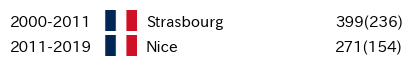

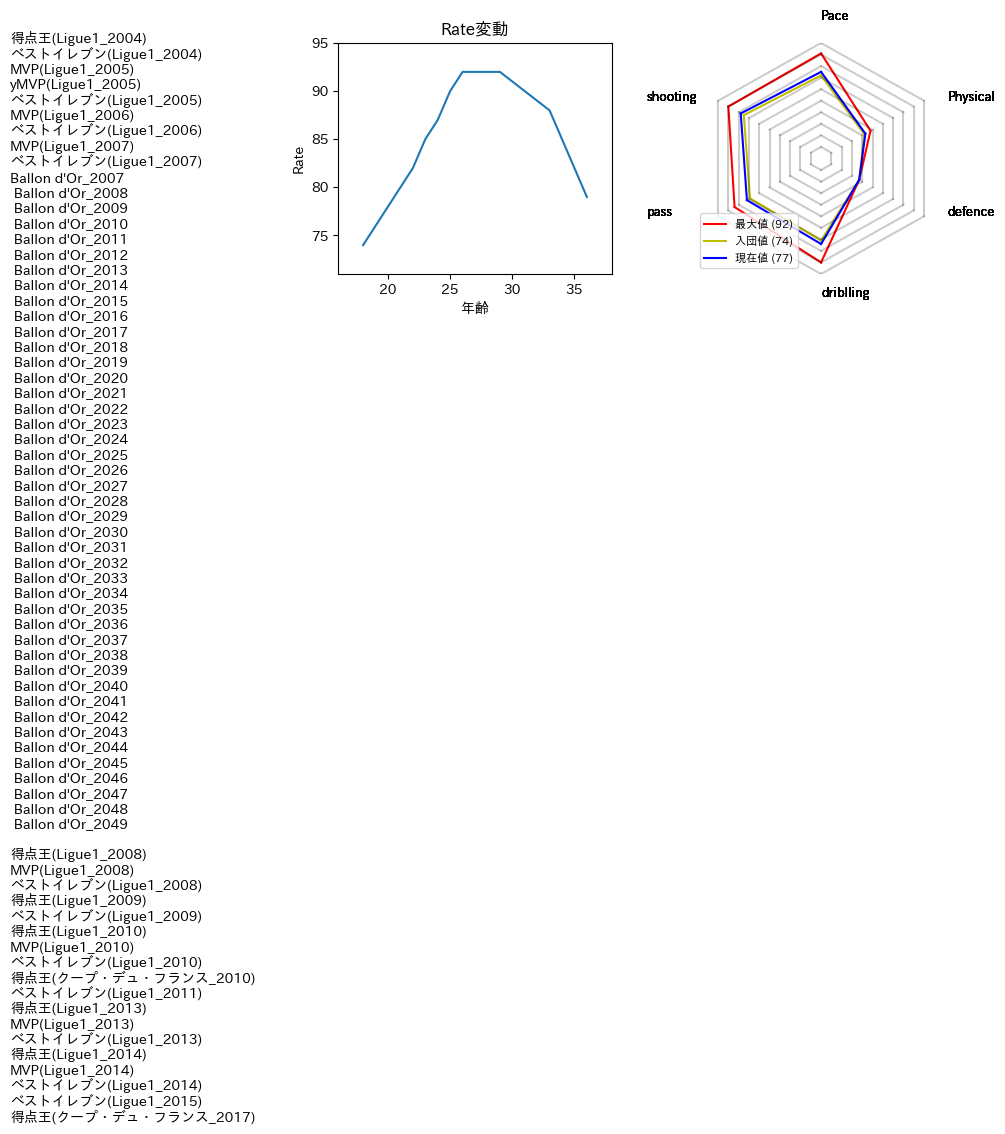

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
1013,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,18,74,6,ST,Ligue1,1,2000,France,Strasbourg,,リーグ,11位,30,607.50,3,1,0,5.221997,0,8,2,,"{""ST"": 30}"
3777,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,19,76,5,ST,Ligue1,1,2001,France,Strasbourg,,リーグ,15位,32,986.25,4,2,0,5.128389,0,0,0,,"{""LW"": 1, ""ST"": 22, ""CM"": 9}"
6700,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,20,78,4,LW,Ligue1,1,2002,France,Strasbourg,,リーグ,16位,35,3150.00,11,6,4,5.877230,3,3,1,,"{""ST"": 0, ""LW"": 24, ""RW"": 11}"
9620,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,21,80,3,RW,Ligue1,1,2003,France,Strasbourg,,リーグ,13位,25,2250.00,11,3,8,6.248759,1,13,2,,"{""CAM"": 0, ""RW"": 25}"
12625,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,22,82,2,RW,Ligue1,1,2004,France,Strasbourg,,リーグ,5位,36,3240.00,25,3,11,6.724469,8,2,1,"得点王(Ligue1_2004),ベストイレブン(Ligue1_2004),","{""LW"": 0, ""RW"": 36}"
15593,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,23,85,1,RW,Ligue1,1,2005,France,Strasbourg,,リーグ,5位,33,2970.00,19,6,10,6.848625,6,5,1,"MVP(Ligue1_2005),yMVP(Ligue1_2005),ベストイレブン(Lig...","{""LW"": 0, ""RW"": 33}"
18556,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,24,87,0,RW,Ligue1,1,2006,France,Strasbourg,,リーグ,2位,30,2700.00,14,8,11,7.080089,6,8,2,"MVP(Ligue1_2006),ベストイレブン(Ligue1_2006),","{""RW"": 30}"
21533,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,25,90,3,RW,Ligue1,1,2007,France,Strasbourg,,リーグ,1位,36,3240.00,31,9,18,7.732313,13,2,0,"MVP(Ligue1_2007),ベストイレブン(Ligue1_2007),Ballon d...","{""LW"": 0, ""RW"": 36}"
24543,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,26,92,2,RW,Ligue1,1,2008,France,Strasbourg,,リーグ,1位,30,2700.00,25,6,17,7.500305,7,8,2,"得点王(Ligue1_2008),MVP(Ligue1_2008),ベストイレブン(Ligu...","{""LW"": 0, ""RW"": 30}"
27566,Nathanal,e72763ca-b212-11ed-9e3c-0da0f061fc7f,27,92,1,RW,Ligue1,1,2009,France,Strasbourg,,リーグ,1位,38,3420.00,34,6,23,7.479043,10,0,0,"得点王(Ligue1_2009),ベストイレブン(Ligue1_2009),","{""RW"": 38}"


In [12]:
uuid_ = "e72763ca-b212-11ed-9e3c-0da0f061fc7f"
print_player(ws, all_member, uuid_)

In [15]:
import uuid
output[output.uuid==uuid.UUID(uuid_)]["賞"].values

array(['', '', '', '', '', '', '', '',
       '得点王(Ligue1_2004),ベストイレブン(Ligue1_2004),', '', '',
       'MVP(Ligue1_2005),yMVP(Ligue1_2005),ベストイレブン(Ligue1_2005),', '',
       'MVP(Ligue1_2006),ベストイレブン(Ligue1_2006),',
       "MVP(Ligue1_2007),ベストイレブン(Ligue1_2007),Ballon d'Or_2007, Ballon d'Or_2008, Ballon d'Or_2009, Ballon d'Or_2010, Ballon d'Or_2011, Ballon d'Or_2012, Ballon d'Or_2013, Ballon d'Or_2014, Ballon d'Or_2015, Ballon d'Or_2016, Ballon d'Or_2017, Ballon d'Or_2018, Ballon d'Or_2019, Ballon d'Or_2020, Ballon d'Or_2021, Ballon d'Or_2022, Ballon d'Or_2023, Ballon d'Or_2024, Ballon d'Or_2025, Ballon d'Or_2026, Ballon d'Or_2027, Ballon d'Or_2028, Ballon d'Or_2029, Ballon d'Or_2030, Ballon d'Or_2031, Ballon d'Or_2032, Ballon d'Or_2033, Ballon d'Or_2034, Ballon d'Or_2035, Ballon d'Or_2036, Ballon d'Or_2037, Ballon d'Or_2038, Ballon d'Or_2039, Ballon d'Or_2040, Ballon d'Or_2041, Ballon d'Or_2042, Ballon d'Or_2043, Ballon d'Or_2044, Ballon d'Or_2045, Ballon d'Or_2046, Ballon d'Or_2047, 

## 年ごとの結果

In [11]:
year = 2026
league_num = 0
league_name = f"{England.leagues[league_num].name}_{year}"
competition_name = f"FA杯_{year}"
England.leagues[league_num].team_result[league_name]
England.competition_result[competition_name]

NameError: name 'England' is not defined

In [ ]:
output = ws.players_result
output.sort_values("Rate", ascending=False).head(30)

In [ ]:
all_member.sort_values("年齢", ascending=False).head(30)

In [ ]:
all_member[all_member["成長タイプ"]=="legend"]

## 全選手成績

In [33]:
output = ws.players_result
#output = output[output["リーグレベル"]==3]
#output = output[output["分類"]=="リーグ"]
output.groupby("uuid").sum()[["試合数", "goal", "assist", "CS", "MOM", "怪我欠場"]].sort_values("MOM", ascending=False).head(20)

,試合数,goal,assist,CS,MOM,怪我欠場
uuid,,,,,,
d4ae185c-91a0-11ed-8327-8791859fff36,743,479,71,104,160,137
749fc53e-91a3-11ed-8327-8791859fff36,734,460,49,109,141,0
2b947e22-91a6-11ed-8327-8791859fff36,487,245,121,163,120,61
d91933ae-91a0-11ed-8327-8791859fff36,763,450,72,81,113,161
d3eb450c-91a0-11ed-8327-8791859fff36,523,310,32,64,110,189
88aa5582-91a1-11ed-8327-8791859fff36,739,259,151,127,110,41
c9f592e6-91a0-11ed-8327-8791859fff36,488,305,41,88,109,83
cac272bc-91a4-11ed-8327-8791859fff36,618,275,93,152,105,69
d8247b24-91a1-11ed-8327-8791859fff36,653,234,101,143,104,0


,名前,年齢,生まれ年,成長タイプ
28859,Markel,48,1982,legend


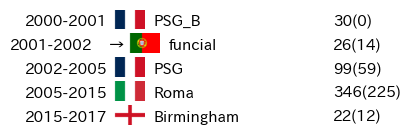

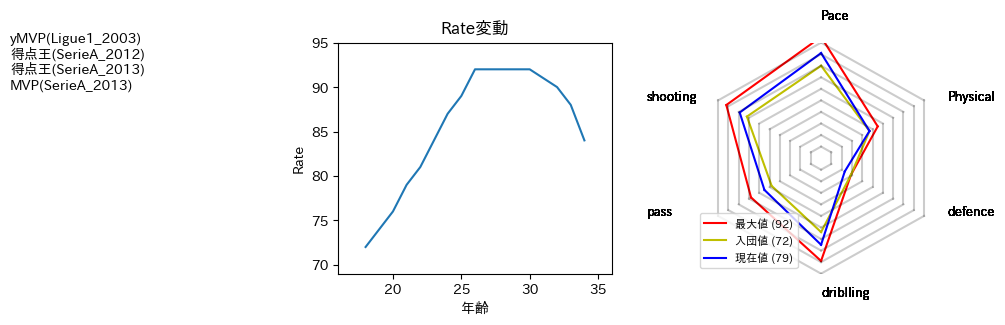

,名前,uuid,年齢,Rate,残契約,ポジション,リーグ,リーグレベル,年度,国,チーム,レンタル元,分類,順位,試合数,出場時間,goal,assist,CS,評価点,MOM,怪我欠場,怪我回数,賞,全ポジション回数
3,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,18,72,4,ST,Under League,10,2000,France,PSG_B,,Bチーム,記録なし,30,1800.00,0,0,0,0.000000,0,0,0,,
4235,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,19,74,3,ST,Liga Portugal2,3,2001,Portugal,funcial,PSG,リーグ,2位,25,2077.50,14,0,3,6.424471,4,15,2,,"{""ST"": 25}"
7238,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,20,76,2,ST,Ligue1,1,2002,France,PSG,,リーグ,6位,35,2936.25,19,1,5,6.179189,3,4,1,,"{""ST"": 35}"
10852,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,21,79,1,ST,Ligue1,1,2003,France,PSG,,リーグ,3位,23,1938.75,17,0,4,6.698359,4,17,2,"yMVP(Ligue1_2003),","{""ST"": 23}"
14599,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,22,81,0,ST,Ligue1,1,2004,France,PSG,,リーグ,14位,36,3015.00,22,1,1,6.086617,8,3,1,,"{""ST"": 36}"
18111,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,23,84,3,ST,SerieA,1,2005,Italy,Roma,,リーグ,4位,31,2591.25,18,0,4,6.331609,3,10,3,,"{""ST"": 31}"
21550,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,24,87,2,ST,SerieA,1,2006,Italy,Roma,,リーグ,7位,33,2831.25,27,2,8,6.824182,7,7,2,,"{""ST"": 33}"
25040,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,25,89,1,ST,SerieA,1,2007,Italy,Roma,,リーグ,5位,38,3251.25,18,4,6,6.420536,5,0,0,,"{""ST"": 38}"
28629,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,26,92,0,ST,SerieA,1,2008,Italy,Roma,,リーグ,5位,29,2471.25,13,2,6,6.430382,6,11,2,,"{""ST"": 29}"
32182,Markel,d3eb450c-91a0-11ed-8327-8791859fff36,27,92,3,ST,SerieA,1,2009,Italy,Roma,,リーグ,12位,28,2358.75,19,2,0,6.345920,10,13,3,,"{""ST"": 28}"


In [37]:
uuid_ = "d3eb450c-91a0-11ed-8327-8791859fff36"
print_player(ws, all_member, uuid_)